## DETECTING FAKE NEWS WITH PYTHON

In this tutorial we will learn how to detect fake news with using Python. First we will learn terms that related to this project like fake news, TfidfVectorizer and PassiveAggressiveClassifier. Using sklearn, we build a TfidfVectorizer on our dataset. Then, we initialize a PassiveAggressive Classifier and fit the model. In the end, the accuracy score and the confusion matrix tell us how well our model fares.

### What is Fake News?
Fake news is a term that has come to mean different things to different people. At its core, we are defining fake news as those news stories that are false: the story itself is fabricated, with no verifiable facts, sources or quotes. Sometimes these stories may be propaganda that is intentionally designed to mislead the reader, or may be designed as “clickbait” written for economic incentives (the writer profits on the number of people who click on the story). In recent years, fake news stories have proliferated via social media, in part because they are so easily and quickly shared online. <sup class = "reference"><a href="https://guides.lib.umich.edu/fakenews">[1]</a></sup>

### What is a TfidfVectorizer?
TfidfVectorizer is a feature extraction algorithm. It converts a collection of raw documents to a matrix of TF-IDF features. <sup class = "reference"><a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html">[2]</a></sup> The raw documents here, is the news in the dataset.

<strong>TF(Term Frequency):</strong> The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

<strong>IDF (Inverse Document Frequency):</strong> Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

<strong>PassiveAggressiveClassifier:</strong> The passive-aggressive algorithms are a family of algorithms for large-scale learning.<sup class = "reference"><a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html#sklearn.linear_model.PassiveAggressiveClassifier">[3]</a></sup> Passive Aggressive algorithms are online learning algorithms. Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting. Unlike most other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.

![title](https://miro.medium.com/max/700/1*qQgnyPLDIkUmeZKN2_ZWbQ.png)

### The Dataset

The dataset we'll use in this project, is called news.csv. This dataset has a shape of 6335×4. The first column identifies the news, the second and third are the title and text, and the fourth column has labels indicating whether the news real or fake.

You can download the dataset from here: https://drive.google.com/file/d/1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q/view

### Steps for the project
1. Import the libraries
2. Read the data
3. Split the dataset
4. Train the TfidfVectorizer
5. Train and predict

### 1. Import the libraries

To run this project properly you'll need some Python libraries. You'll need to install the following libraries with pip:

pip install numpy pandas sklearn seaborn

Also you'll need Jupyter Lab to run this project.

In [2]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### 2. Read the data

Let's read the data into a DataFrame, and get the first 5 records.

In [4]:
df = pd.read_csv("./news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### 3. Split the dataset
X defines the news on the dataset, and y defines the labels on the dataset. We don't need to use title column because, we need to train the model only with news, which is the text column. Then split the dataset into training and testing sets.

In [41]:
X = df.text
y = df.label #or df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

### 4. Train the TfidfVectorizer
Let’s initialize a TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7 (terms with a higher document frequency will be discarded). Stop words are the most common words in a language that are to be filtered out before processing the natural language data. And a TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features.

Now, fit and transform the vectorizer on the train set, and transform the vectorizer on the test set. After the transform, we can print some values to see what are outputs like. First we're going to print the type of the tfidf_test variable. It says the tfidf_test variable is sparse matrix. Second and third we're going to print the shape of the train and test variables. If we look at the tfidf_test.shape result, the first value in the tuple, represents row count of the test data, and the second value represents word count in the text column.

In [42]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(X_train)
tfidf_test=tfidf_vectorizer.transform(X_test)

print(type(tfidf_test))
print(tfidf_train.shape)
print(tfidf_test.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(5068, 61651)
(1267, 61651)


### 5. Train and predict
Next, we’ll initialize a PassiveAggressiveClassifier. We’ll fit this on tfidf_train and y_train.

Then, we’ll predict on the test set from the TfidfVectorizer and calculate the accuracy with accuracy_score() from sklearn.metrics.

In [46]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.98%


We got an accuracy of 92.98% with this model. Let’s print out a confusion matrix to gain insight into the number of false and true negatives and positives.

In [47]:
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cm)

[[589  49]
 [ 40 589]]


So with this model, we have 589 true positives, 589 true negatives, 40 false positives, and 49 false negatives.

Finally let's print the graph of confusion matrix.

<AxesSubplot:>

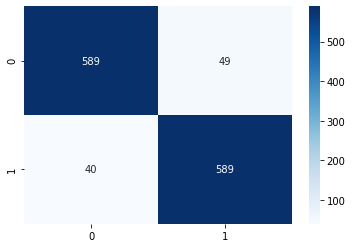

In [48]:
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')

### References
1. UNIVERSITY OF MICHIGAN LIBRARY, <https://guides.lib.umich.edu/fakenews>
2. Scikit-learn, <https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html>
3. Scikit-learn, <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html>